# Install Required Libraries
Install the necessary libraries, including pandas, numpy, matplotlib, and seaborn.


In [1]:
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, and seaborn.

In [2]:
# 1: Import Libraries
# pandas for data manipulation.
# numpy for numerical operations.
# matplotlib and seaborn for data visualization.
# sklearn for machine learning tasks.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Dataset
Load the diabetes dataset using pandas.

In [8]:
# Load the diabetes dataset using pandas
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Basic Dataset Information
Display basic information about the dataset, including the number of rows and columns, data types, and first few rows.

In [9]:
# Basic Dataset Information

# Display the number of rows and columns in the dataset
rows, cols = df.shape
print(f'The dataset contains {rows} rows and {cols} columns.')

# Display the data types of each column
print('\nData types of each column:')
print(df.dtypes)

# Display the first few rows of the dataset
print('\nFirst few rows of the dataset:')
print(df.head())

# Display basic statistical details of the dataset
print('\nBasic statistical details of the dataset:')
print(df.describe())

# Check for missing values in the dataset
print('\nMissing values in the dataset:')
print(df.isnull().sum())

The dataset contains 768 rows and 9 columns.

Data types of each column:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31    

# Exploratory Data Analysis (EDA)
Perform exploratory data analysis to understand the dataset better.

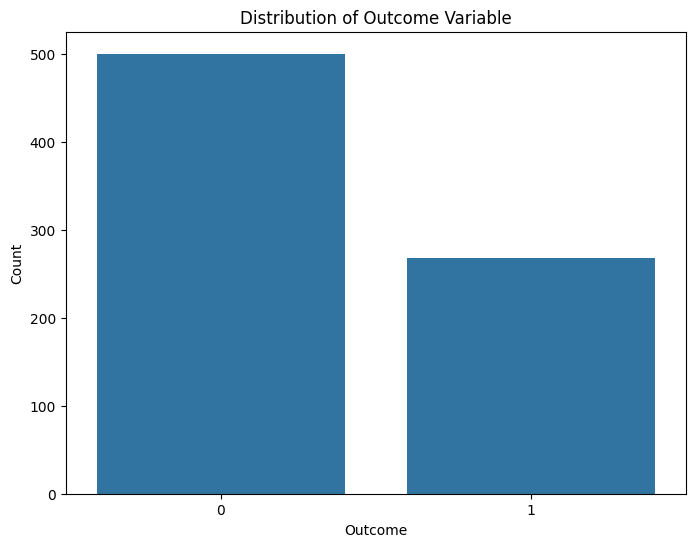

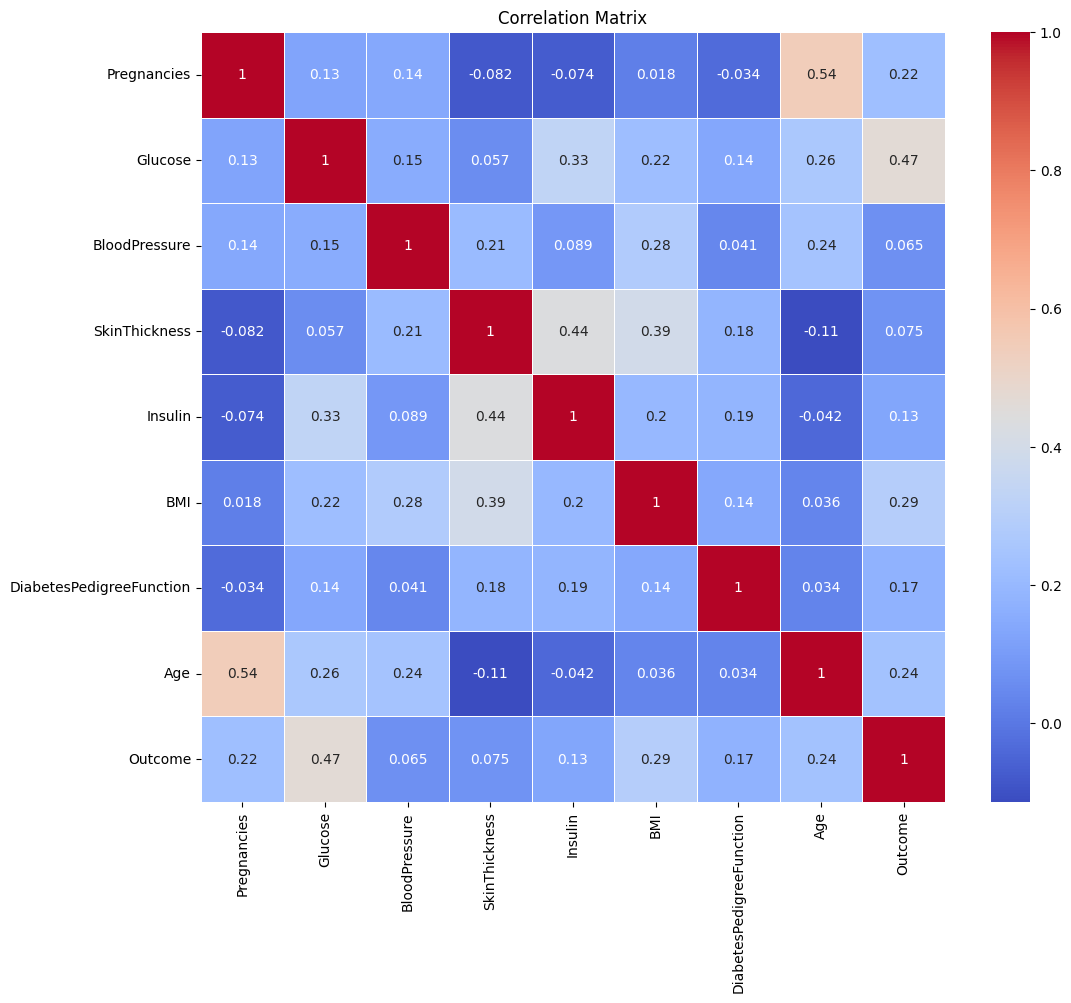

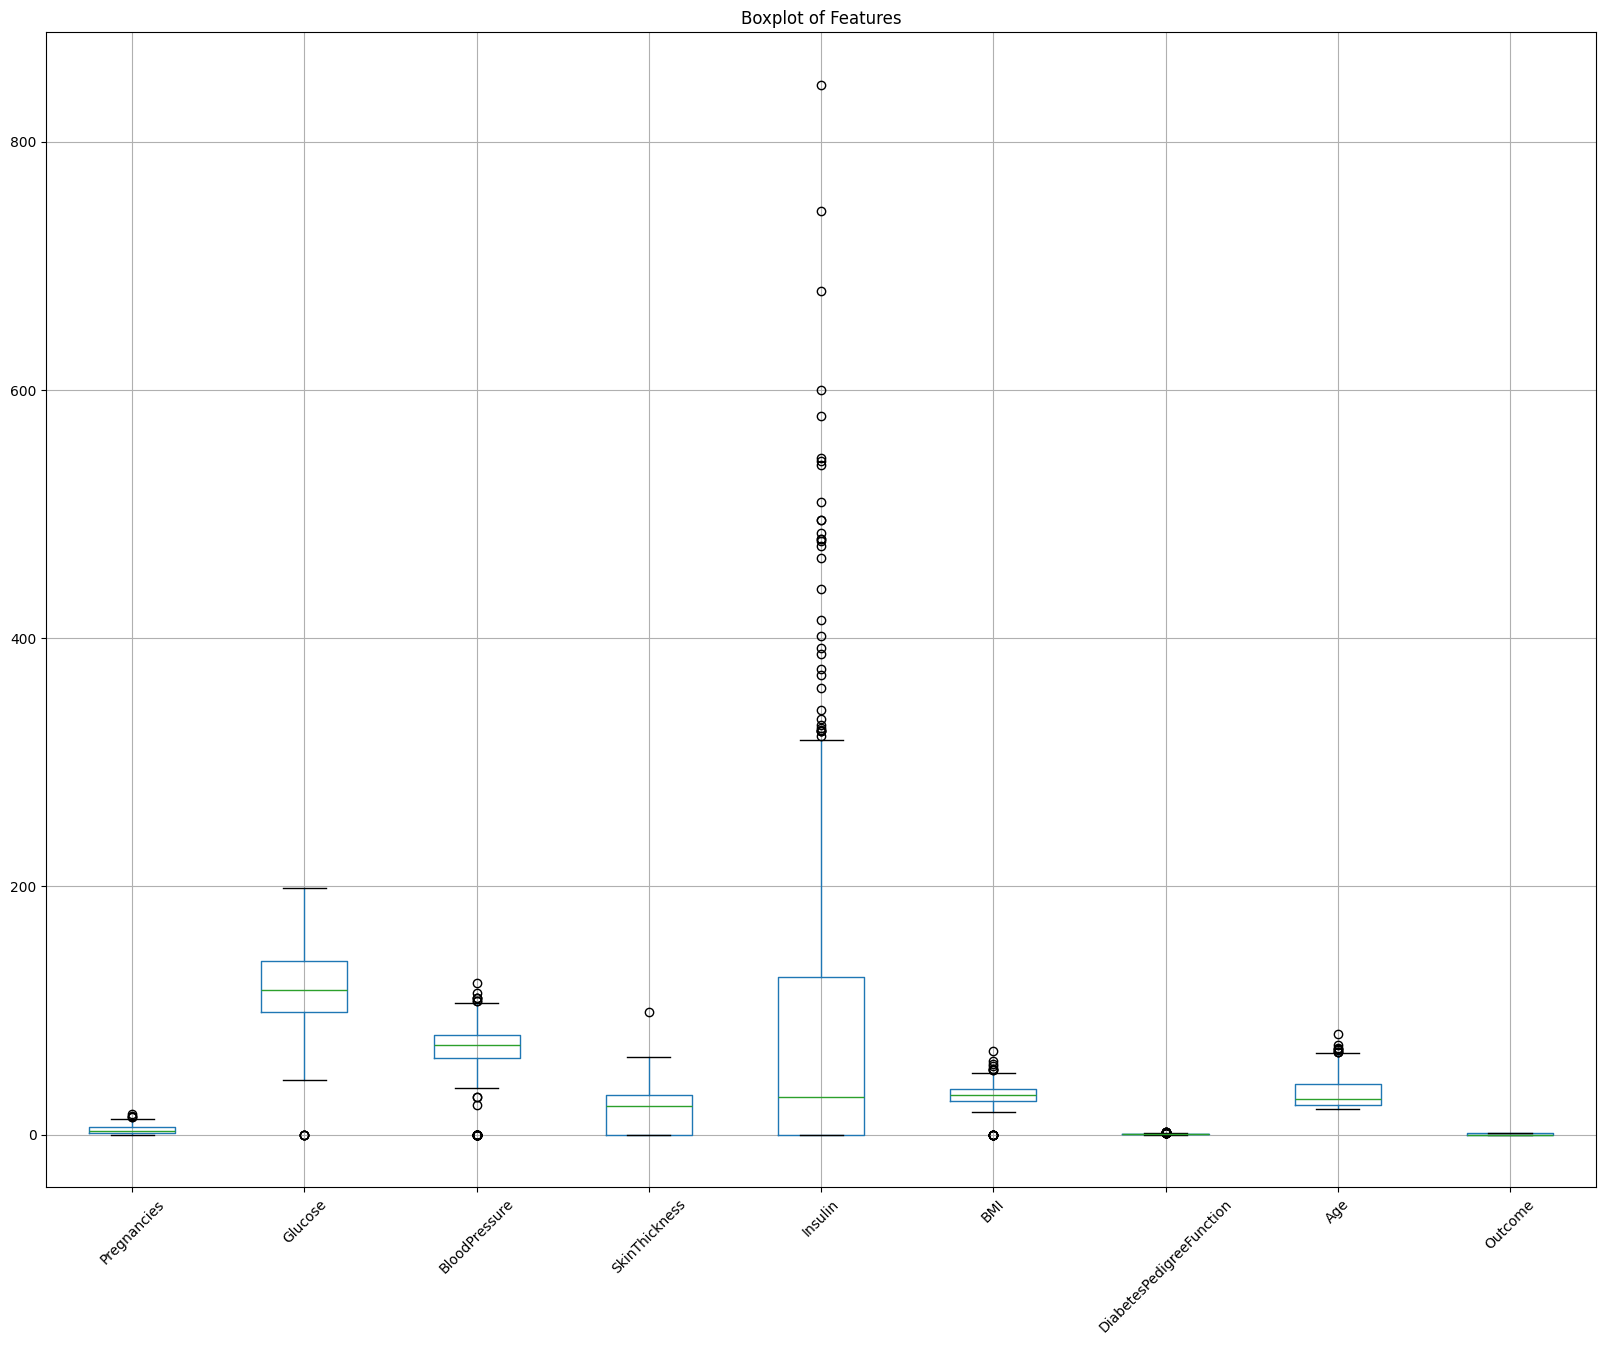

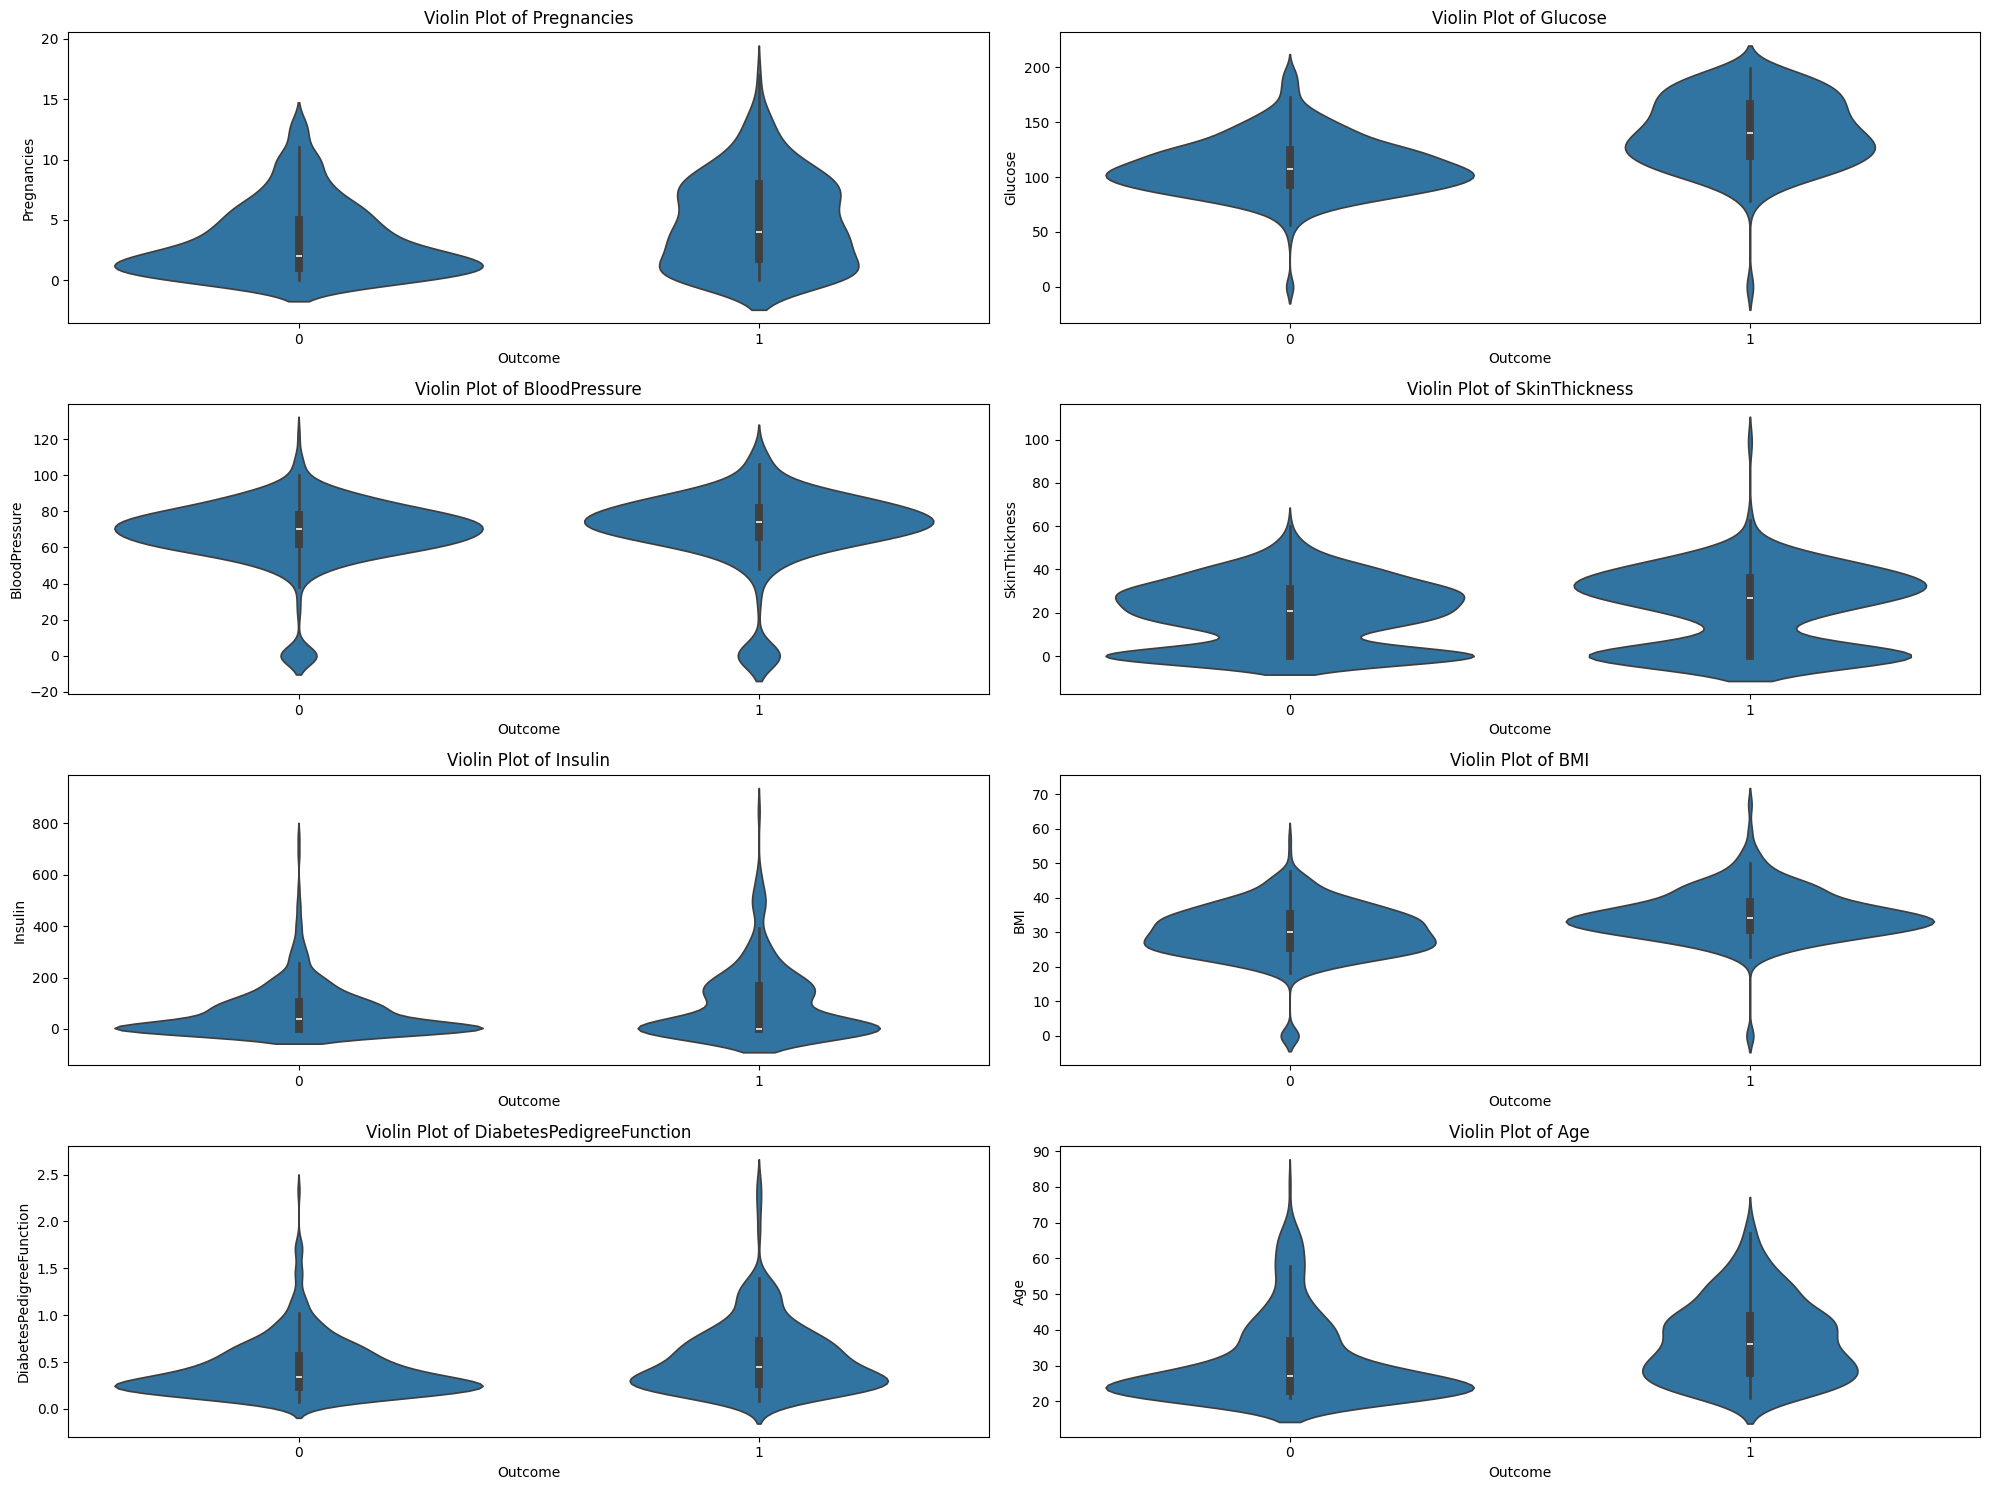

In [14]:
# Exploratory Data Analysis (EDA)

# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome Variable')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Boxplot of features
plt.figure(figsize=(20, 15))
df.boxplot()
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

# Violin plots for each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 2, i)
    sns.violinplot(x='Outcome', y=column, data=df)
    plt.title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()

# Statistical Summary
Generate a statistical summary of the dataset using the describe() method.

In [15]:
# Statistical Summary

# Generate a statistical summary of the dataset using the describe() method
statistical_summary = df.describe()
print('\nStatistical Summary of the Dataset:')
print(statistical_summary)


Statistical Summary of the Dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951 

# Process the Dataset


In [17]:
# 3: Preprocess & Split Data

#Separate Features and Target Variable
X = df.drop(columns=['Outcome'])
y = df['Outcome']

#Split into Training & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
Random Forest Model to classify the outcome

In [6]:
# 4: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate the Model



Accuracy: 0.72


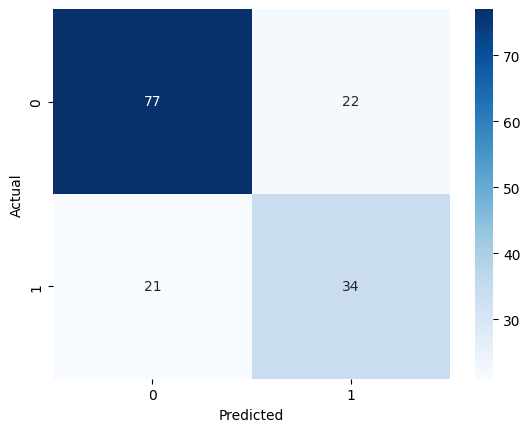

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [7]:
# 5: Evaluate the Model

#Predict and Check Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Classification Report
print(classification_report(y_test, y_pred))